In [1]:
import sys
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

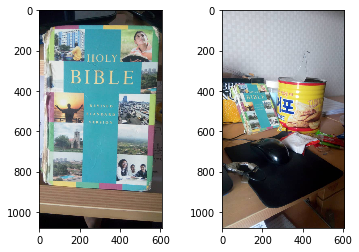

In [2]:
img1 = cv2.imread('./the_bible.jpeg')
img2 = cv2.imread('./bible.jpeg')
fig = plt.figure() # parallel display of images
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
img_with_kp = None
img_with_kp = cv2.drawKeypoints(img1,kp1,img_with_kp)

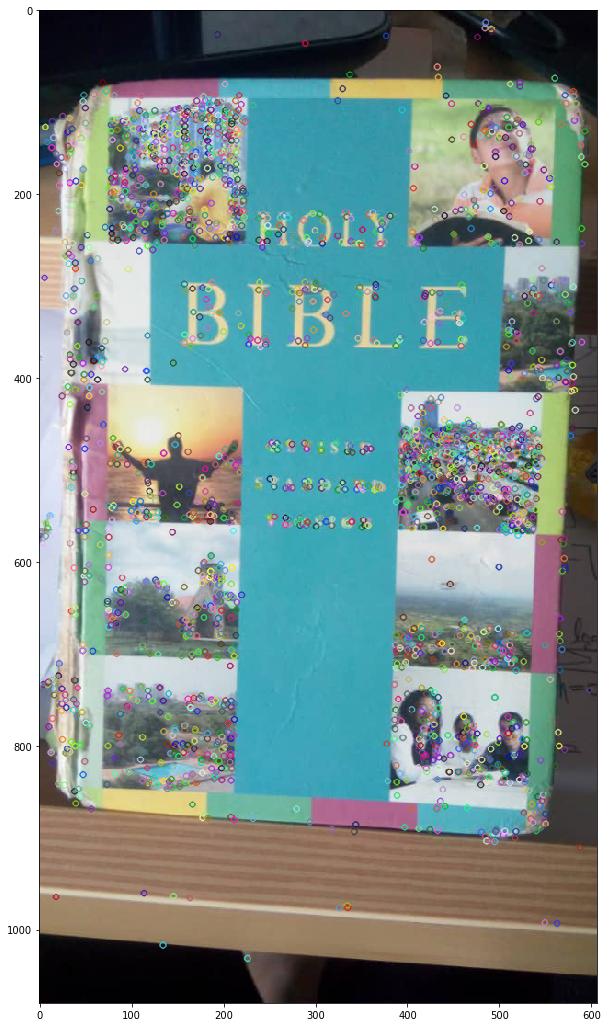

In [7]:
# converting image from BGR to RGB (OpenCV design)
plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))

In [8]:
# BFMatcher with default params
bf = cv2.BFMatcher()

In [9]:
matches = bf.knnMatch(des1,des2, k=2)

In [15]:
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

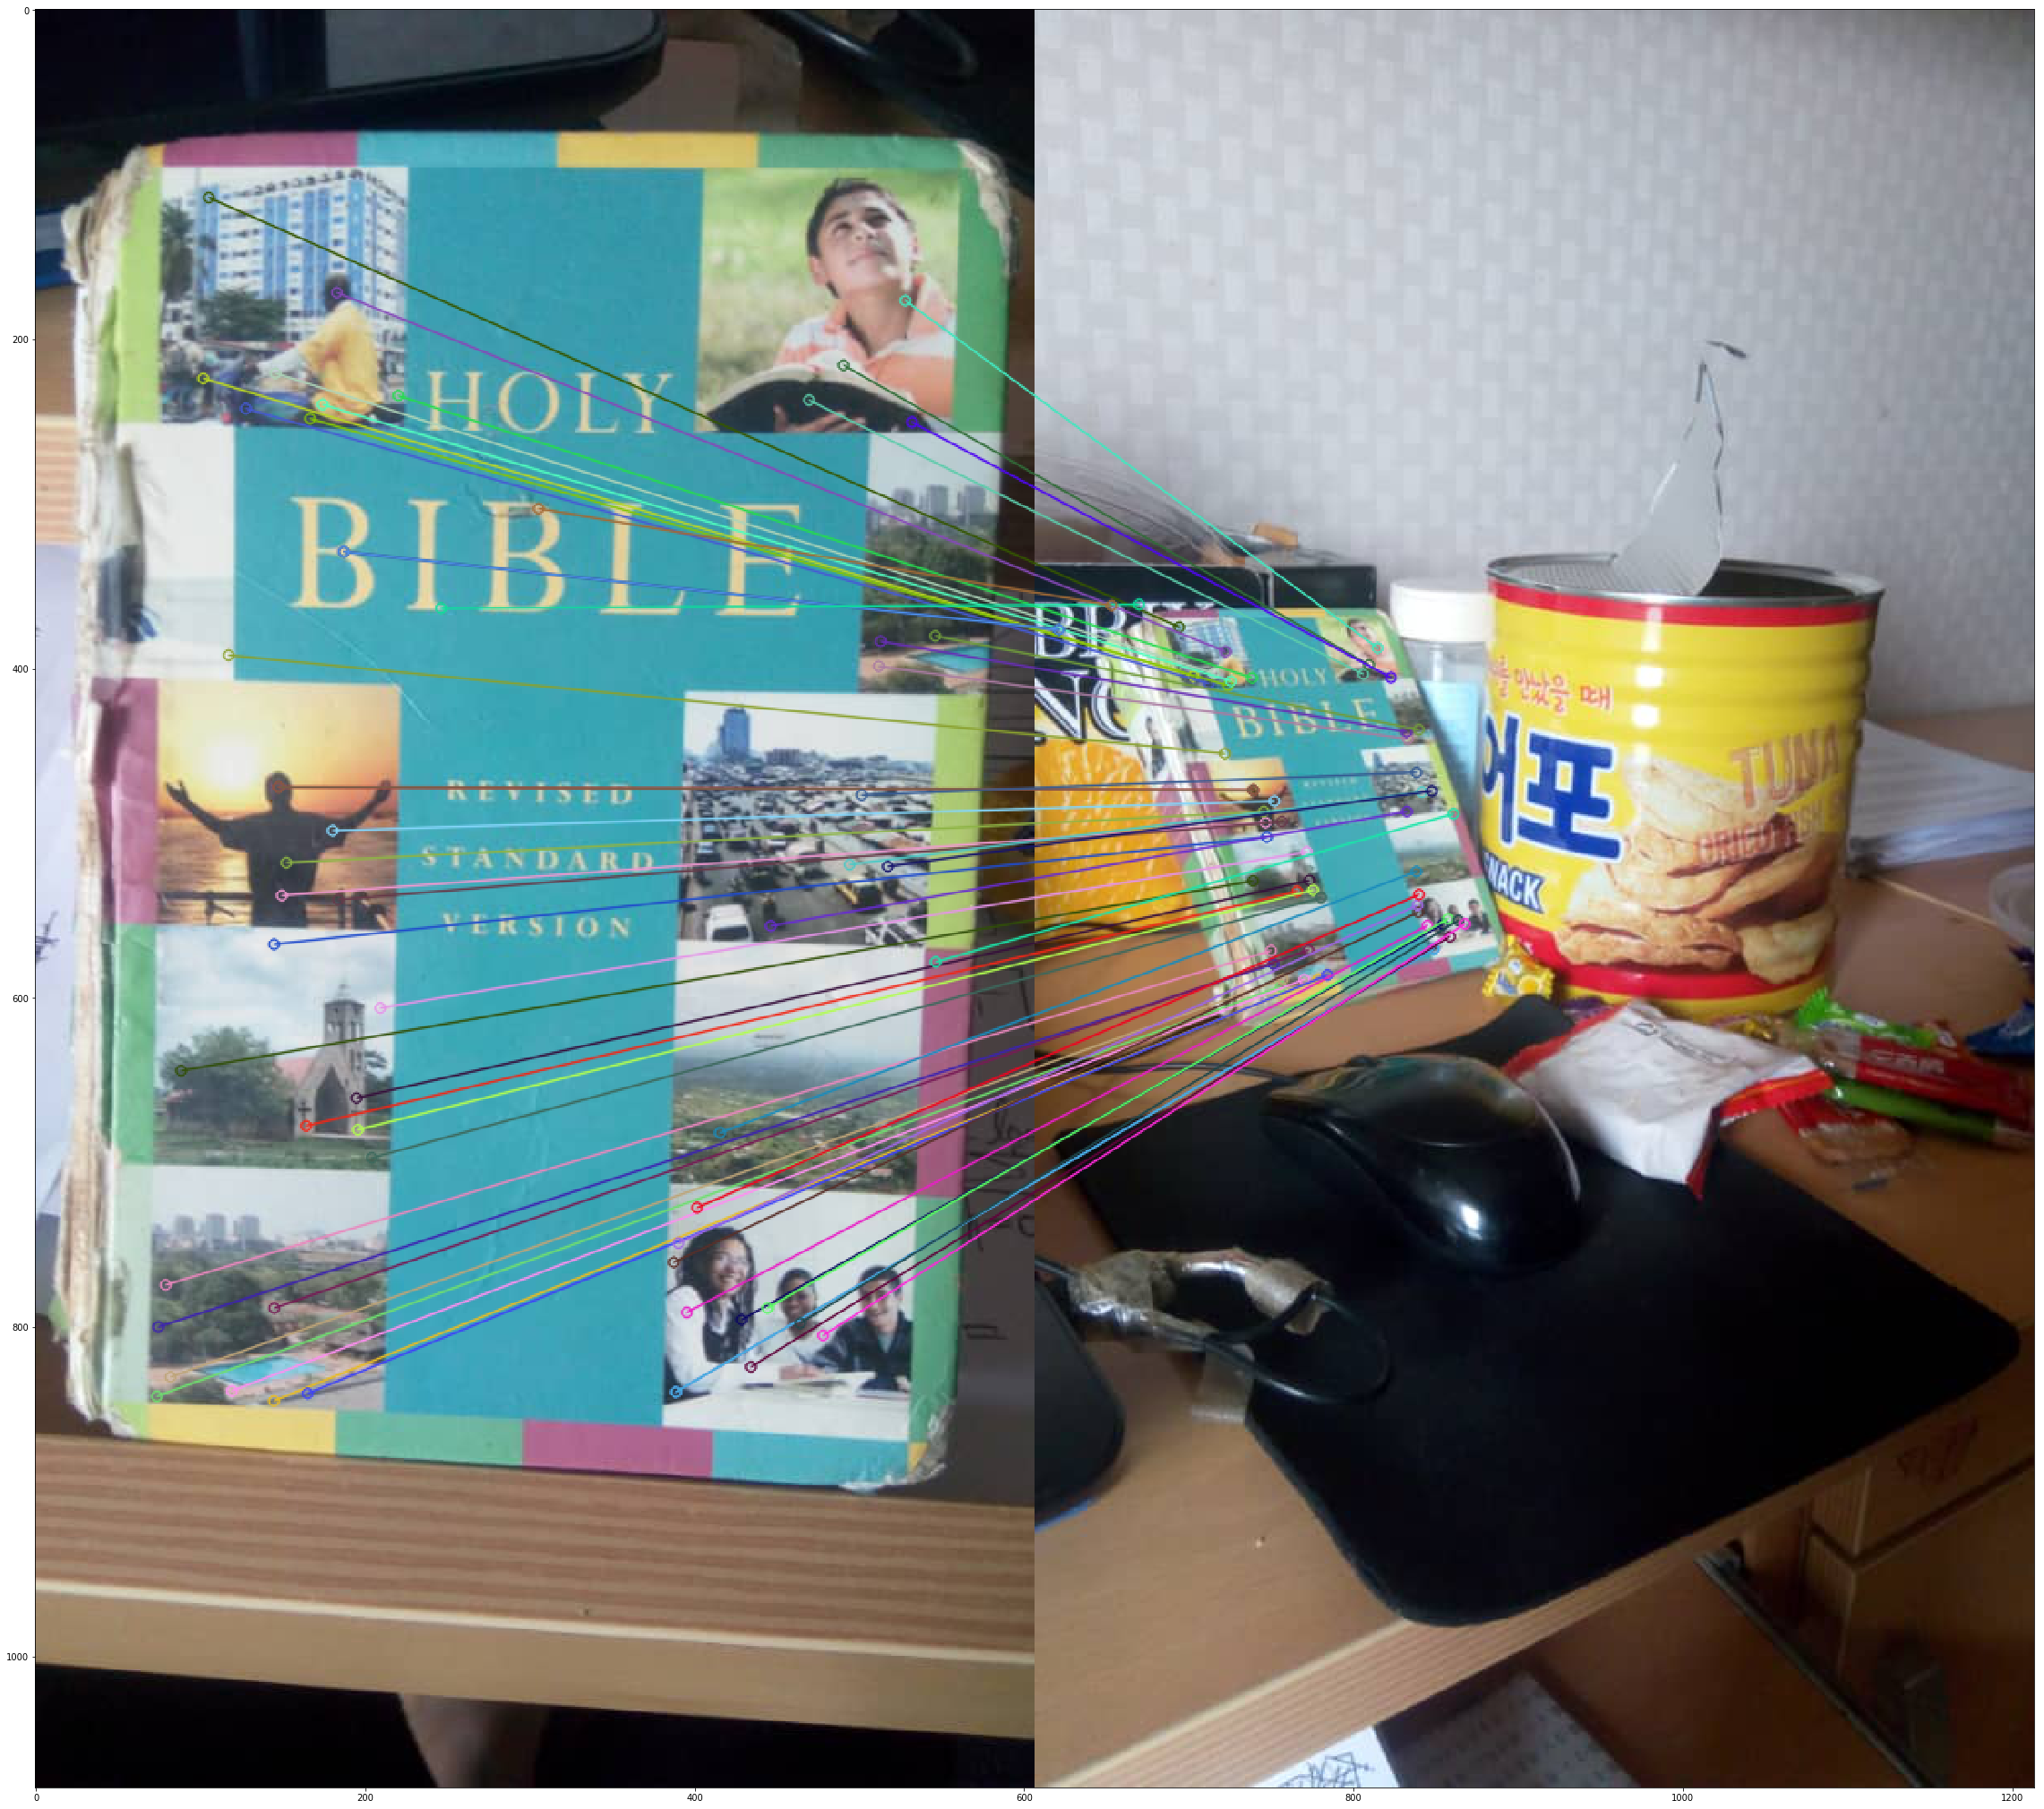

In [16]:
# h1, w1, c1 = img1.shape[:3]
# h2, w2, c2 = img2.shape[:3]
# height = max([h1,h2])
# width = w1 + w2
# out = np.zeros((height, width, 3), np.uint8)
img3 = None
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.figure(figsize=(40, 80))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))